In [113]:
# Import Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [114]:
#Set the names of the columns of our csv file. In this case we downloaded the one regarding heart diseases
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'tal', 'target']
heart= pd.read_csv("/Users/SebastianJuarez/Desktop/heart.csv", header=None, names=col_names)

In [115]:
heart.head() # Testing the parse of pandas' Series

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,tal,target
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [116]:
#Feature Selection
X=heart.drop('target', axis = 1,)#Features we want to test out, we take all but the target label (thats what axis is for)
X=X.drop([0,0])                  #In order to remove index (row) 0 which contained labels
y = heart.target                 #The column containing the result of the test
y=y.drop([0,0])                  #We just take the target label and remove its 0 row containing its label

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) #75%training 

In [118]:
clfObjt = DecisionTreeClassifier()     #Decision Tree classifier object
clfObjt = clfObjt.fit(X_train,y_train) #Train Decision Tree Classifier
y_predict= clfObjt.predict(X_test)     #Predict the response for test dataset

In [119]:
#Evaluation of the model: Here we get the accuracy, how often the classifier is correct.
print("Accuracy = ", metrics.accuracy_score(y_test, y_predict))

Accuracy =  0.7631578947368421


In [120]:
#Now into visualizing the Decision Trees, we include the following libraries to get our Decision tree's png image.
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

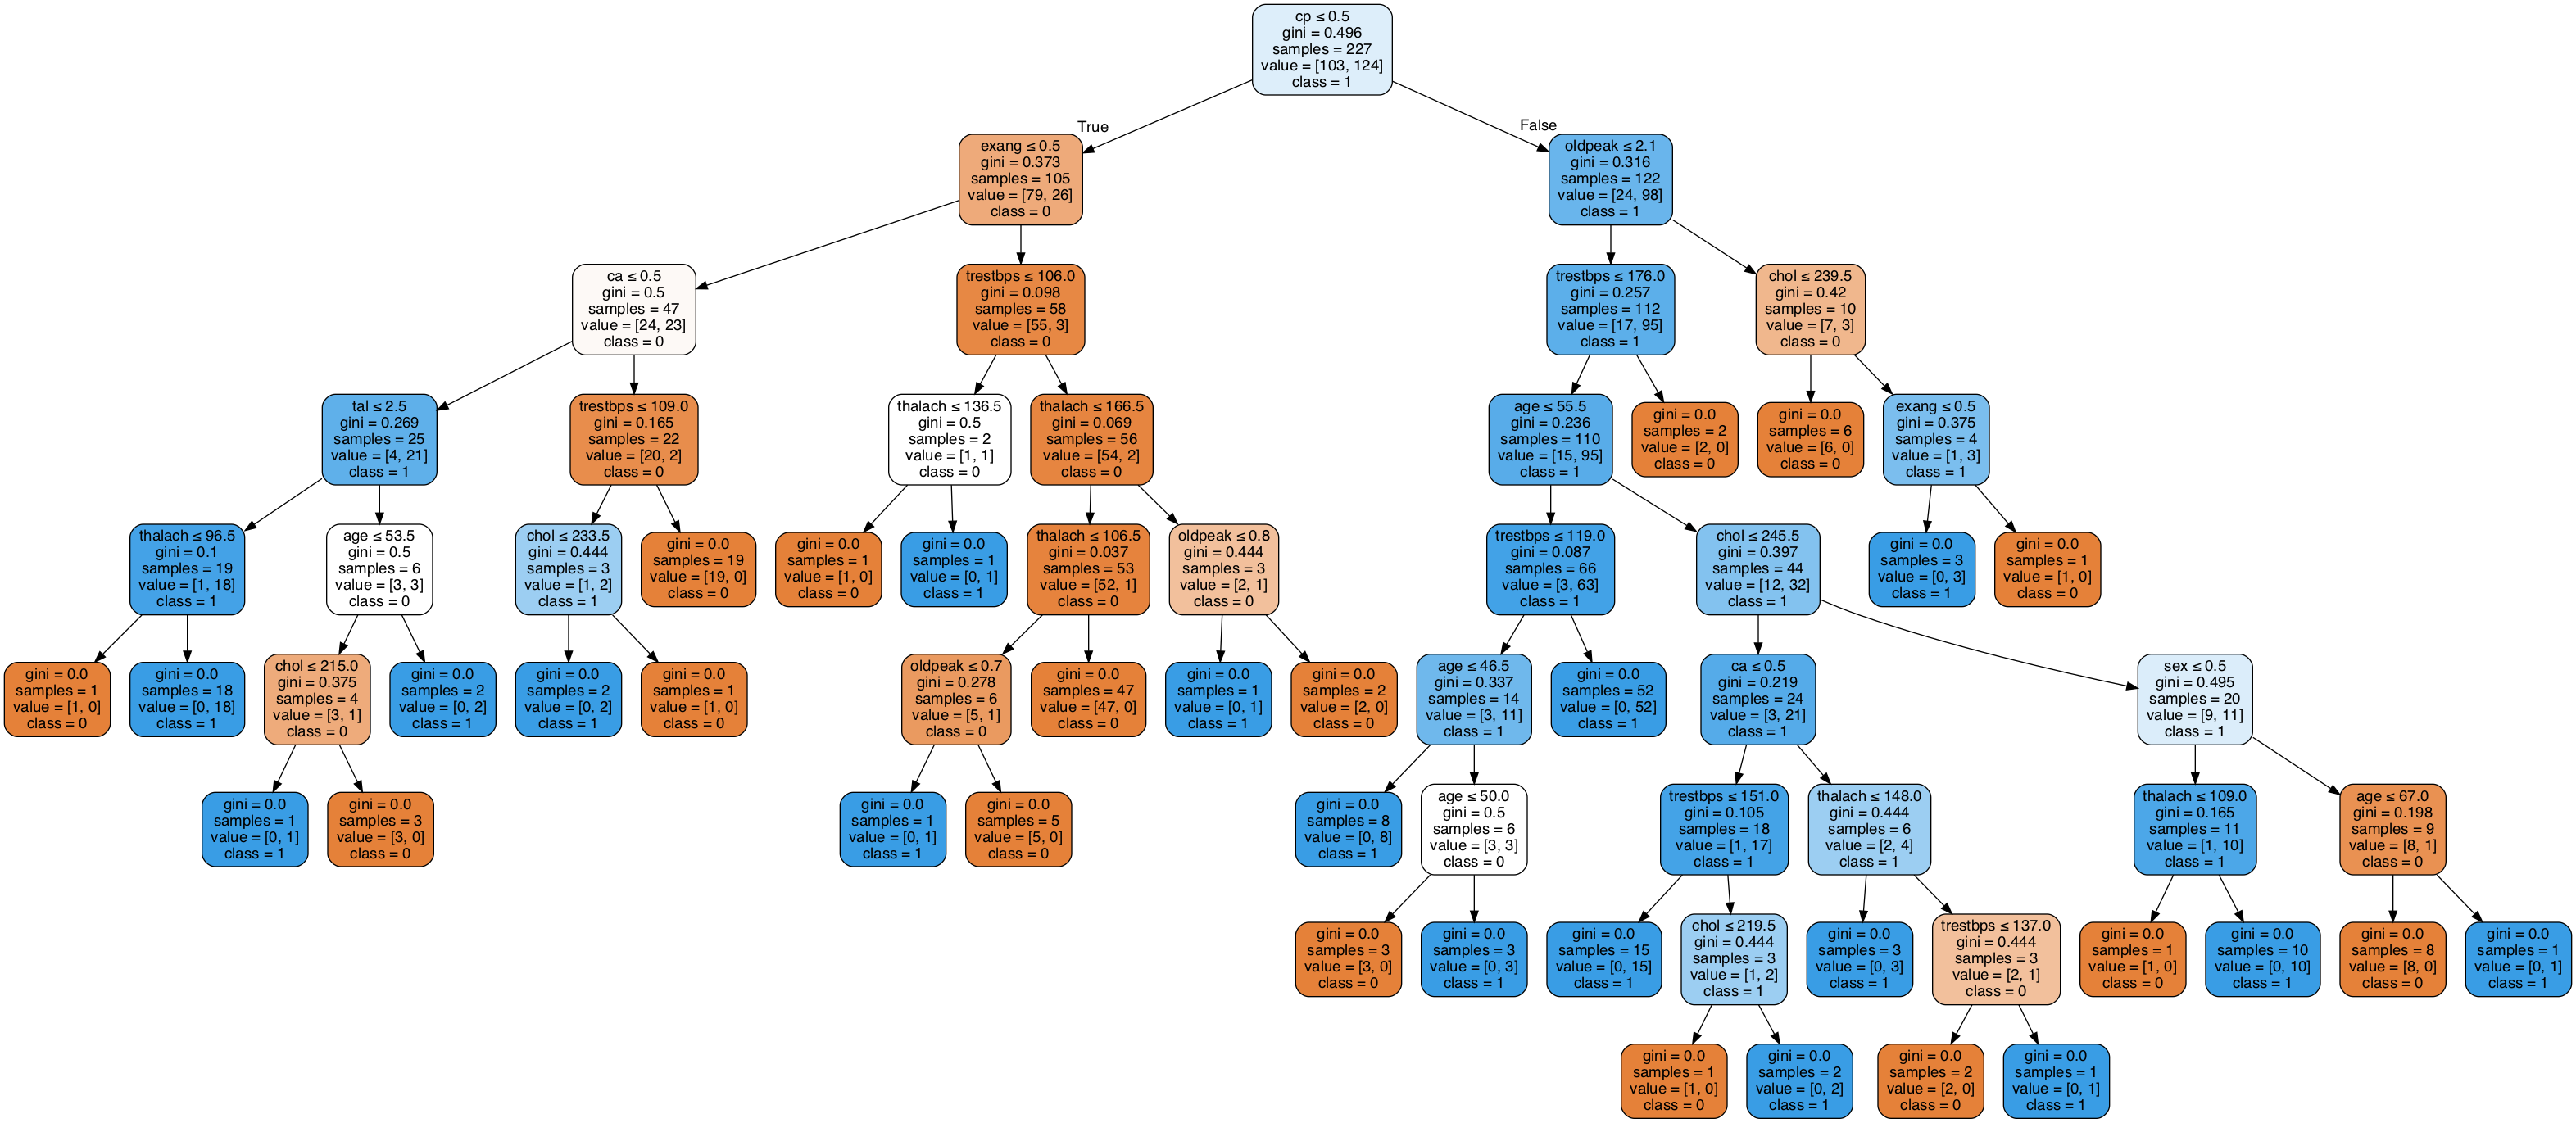

In [121]:
#We create a new col_names variables to use as feature-only labels, so we exclude the 'target' one.
ncol_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'tal']
dot_data = StringIO()
export_graphviz(clfObjt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ncol_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heartDisease.png')
Image(graph.create_png())